# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W1022 09:45:27.246495 11232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1022 09:45:27.247495 11232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1022 09:45:27.879191 11232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1022 09:45:27.884186 11232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1022 09:45:27.912168 11232 

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W1022 09:45:28.433067 11232 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 209us/step - loss: 2.3190 - acc: 0.1046 - val_loss: 2.3064 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.3044 - acc: 0.1000 - val_loss: 2.3042 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.3045 - acc: 0.0999 - val_loss: 2.3040 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 11s 220us/step - loss: 2.3040 - acc: 0.1002 - val_loss: 2.3039 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.3040 - acc: 0.1020 - val_loss: 2.3035 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.3038 - acc: 0.0997 - val_loss: 2.3050 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 11s 211us/step - loss: 2.3043 - acc: 0.1002 - val_loss: 2.30

50000/50000 [==============================] - 11s 219us/step - loss: 1.8295 - acc: 0.3454 - val_loss: 1.6912 - val_acc: 0.3940
Epoch 2/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.6042 - acc: 0.4312 - val_loss: 1.6180 - val_acc: 0.4244
Epoch 3/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5154 - acc: 0.4611 - val_loss: 1.5526 - val_acc: 0.4420
Epoch 4/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.4546 - acc: 0.4834 - val_loss: 1.4862 - val_acc: 0.4713
Epoch 5/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.4075 - acc: 0.4997 - val_loss: 1.4548 - val_acc: 0.4768
Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.3676 - acc: 0.5139 - val_loss: 1.5051 - val_acc: 0.4678
Epoch 7/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.3250 - acc: 0.5301 - val_loss: 1.4568 - val_acc: 0.4744
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 9s 187us/step - loss: 1.7901 - acc: 0.3735 - val_loss: 1.7423 - val_acc: 0.3932
Epoch 3/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.7065 - acc: 0.4040 - val_loss: 1.6769 - val_acc: 0.4081
Epoch 4/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.6498 - acc: 0.4227 - val_loss: 1.6253 - val_acc: 0.4274
Epoch 5/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.6032 - acc: 0.4373 - val_loss: 1.5966 - val_acc: 0.4357
Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.5653 - acc: 0.4485 - val_loss: 1.5557 - val_acc: 0.4545
Epoch 7/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.5325 - acc: 0.4618 - val_loss: 1.5310 - val_acc: 0.4592
Epoch 8/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.5030 - acc: 0.4728 - val_loss: 1.5103 - val_acc: 0.4632
Epoch 9/50
50000/50000 [================

50000/50000 [==============================] - 10s 203us/step - loss: 2.1003 - acc: 0.2574 - val_loss: 2.0544 - val_acc: 0.2732
Epoch 3/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.0181 - acc: 0.2914 - val_loss: 1.9882 - val_acc: 0.2989
Epoch 4/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.9621 - acc: 0.3164 - val_loss: 1.9426 - val_acc: 0.3251
Epoch 5/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.9226 - acc: 0.3316 - val_loss: 1.9076 - val_acc: 0.3384
Epoch 6/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.8913 - acc: 0.3452 - val_loss: 1.8823 - val_acc: 0.3495
Epoch 7/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.8667 - acc: 0.3529 - val_loss: 1.8601 - val_acc: 0.3529
Epoch 8/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.8465 - acc: 0.3599 - val_loss: 1.8403 - val_acc: 0.3641
Epoch 9/50
50000/50000 [==============

50000/50000 [==============================] - 10s 196us/step - loss: 2.2690 - acc: 0.1462 - val_loss: 2.2569 - val_acc: 0.1588
Epoch 3/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.2467 - acc: 0.1646 - val_loss: 2.2369 - val_acc: 0.1809
Epoch 4/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.2283 - acc: 0.1862 - val_loss: 2.2192 - val_acc: 0.2001
Epoch 5/50
50000/50000 [==============================] - 13s 255us/step - loss: 2.2119 - acc: 0.1997 - val_loss: 2.2032 - val_acc: 0.2115
Epoch 6/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.1967 - acc: 0.2073 - val_loss: 2.1885 - val_acc: 0.2226
Epoch 7/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.1826 - acc: 0.2217 - val_loss: 2.1744 - val_acc: 0.2345
Epoch 8/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.1690 - acc: 0.2284 - val_loss: 2.1610 - val_acc: 0.2430
Epoch 9/50
50000/50000 [==============

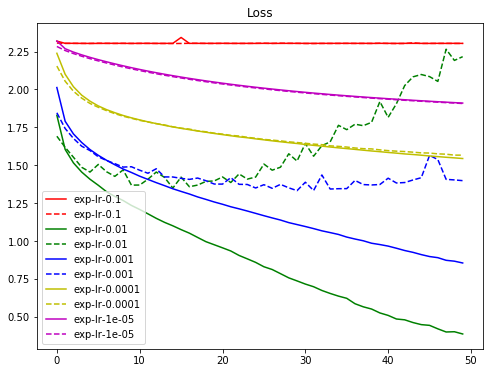

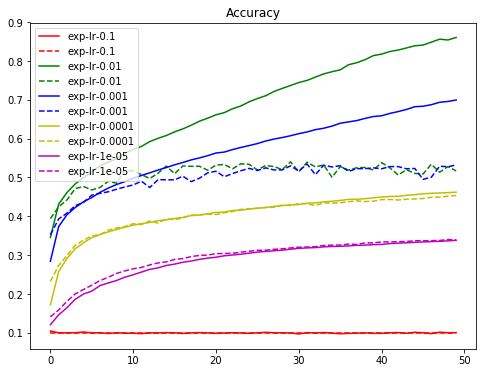

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()